In [2]:
import numpy as np
import matplotlib.pyplot as plt

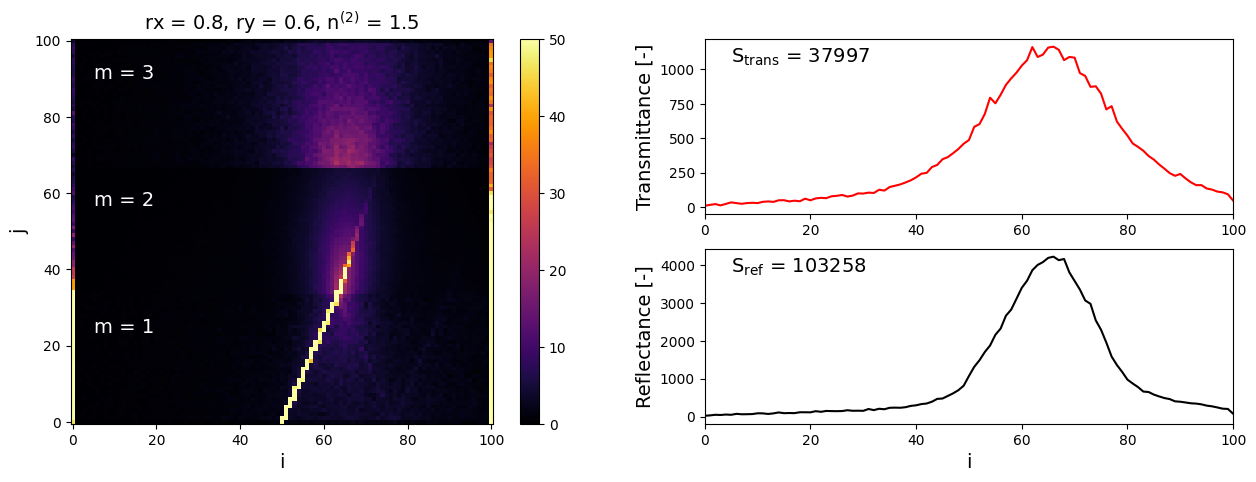

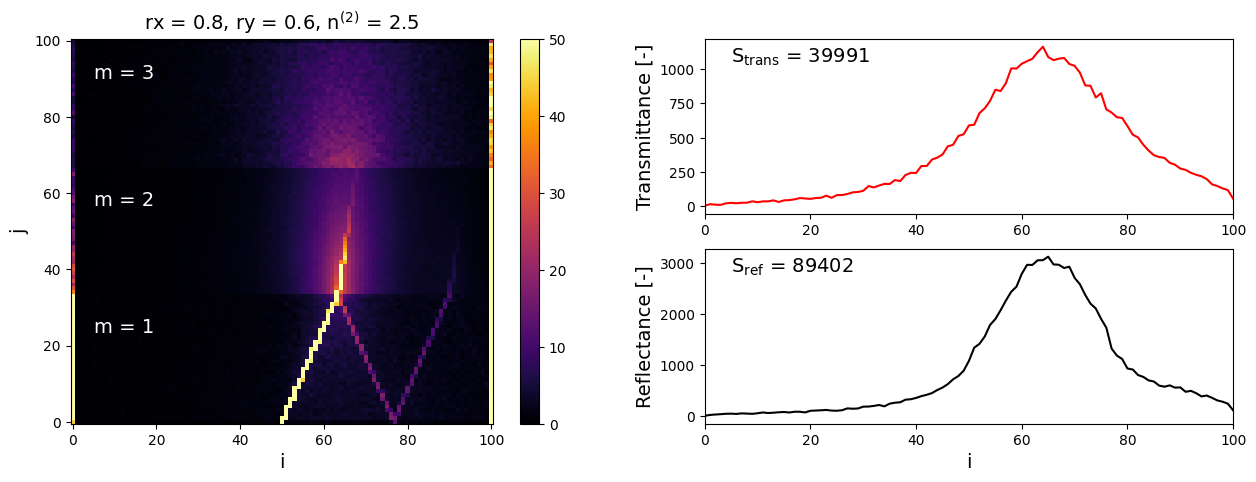

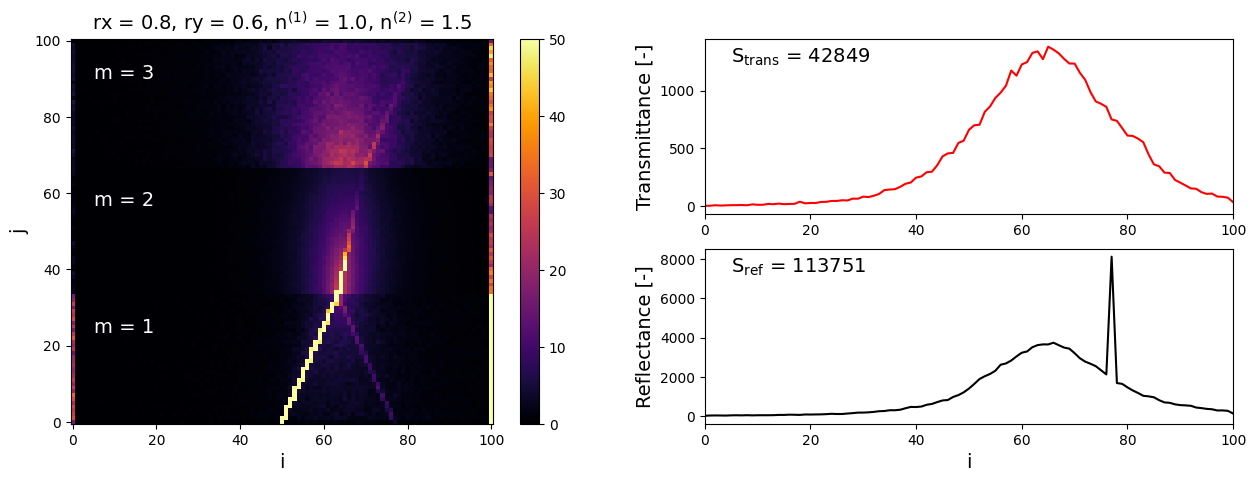

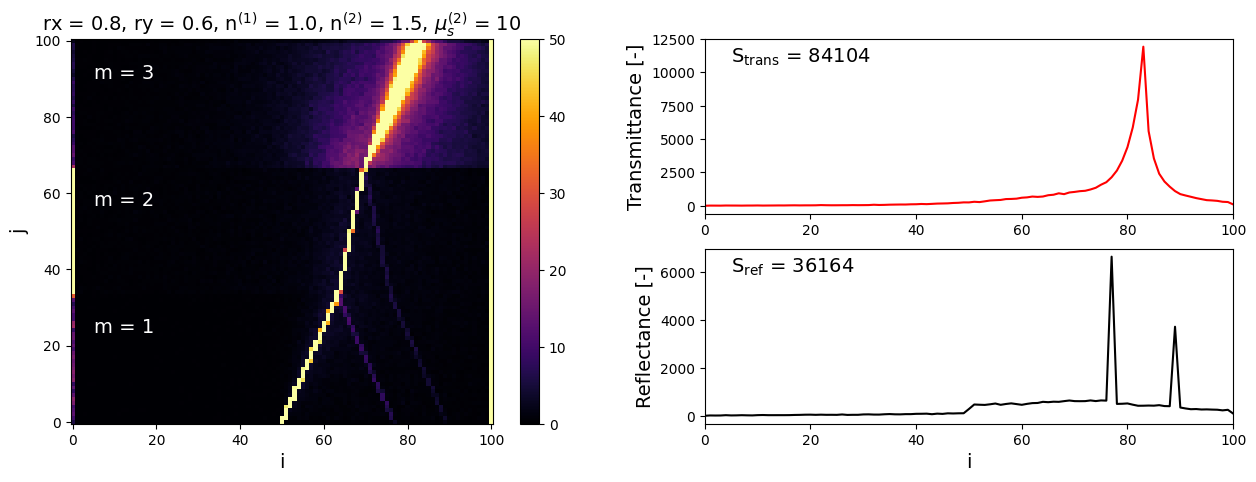

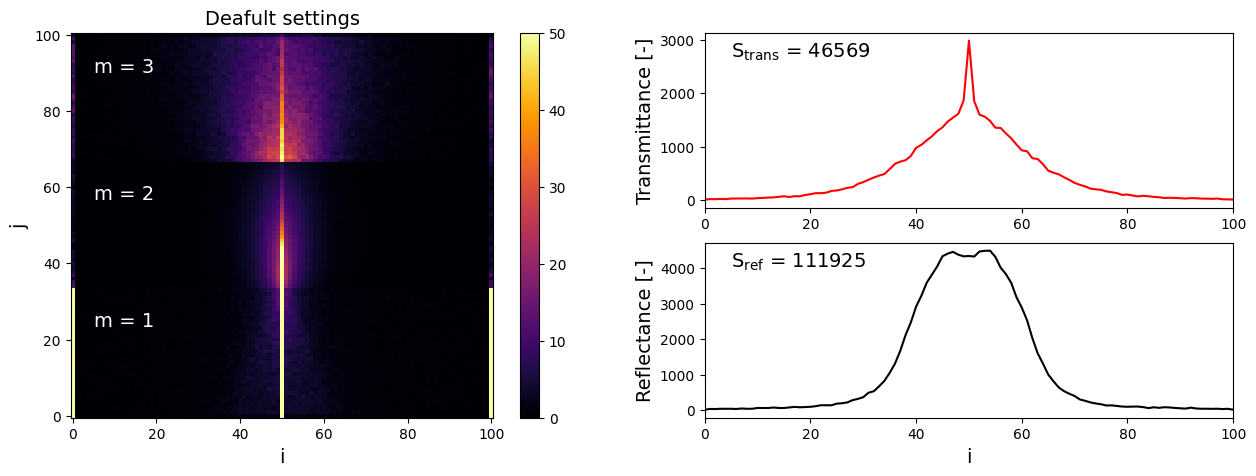

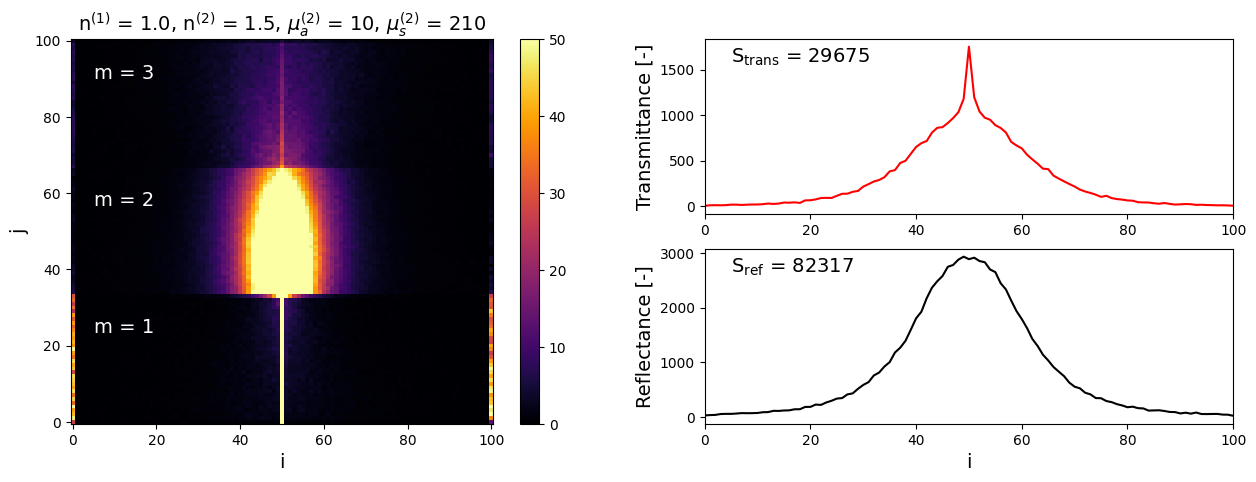

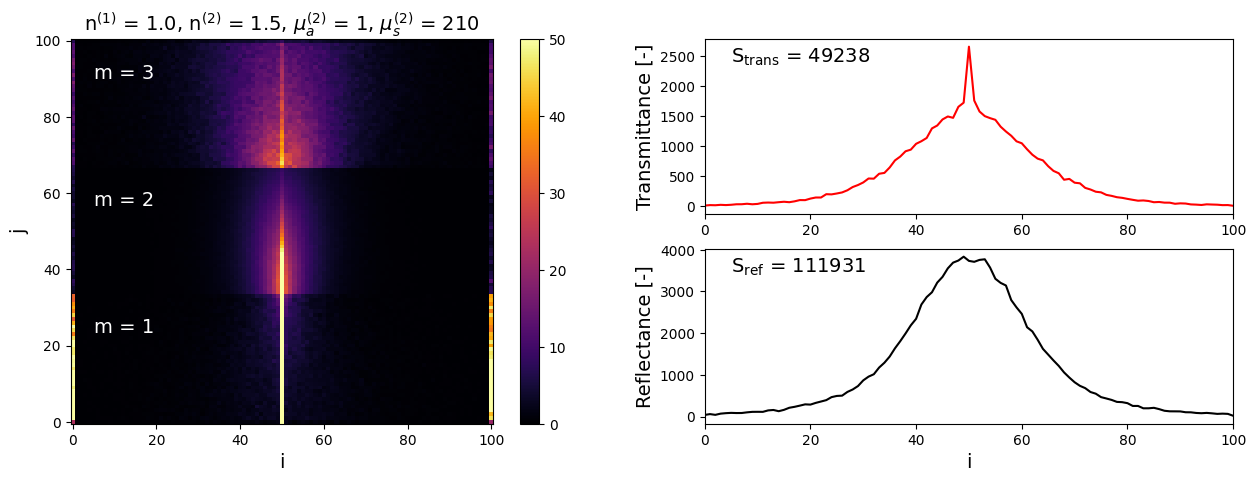

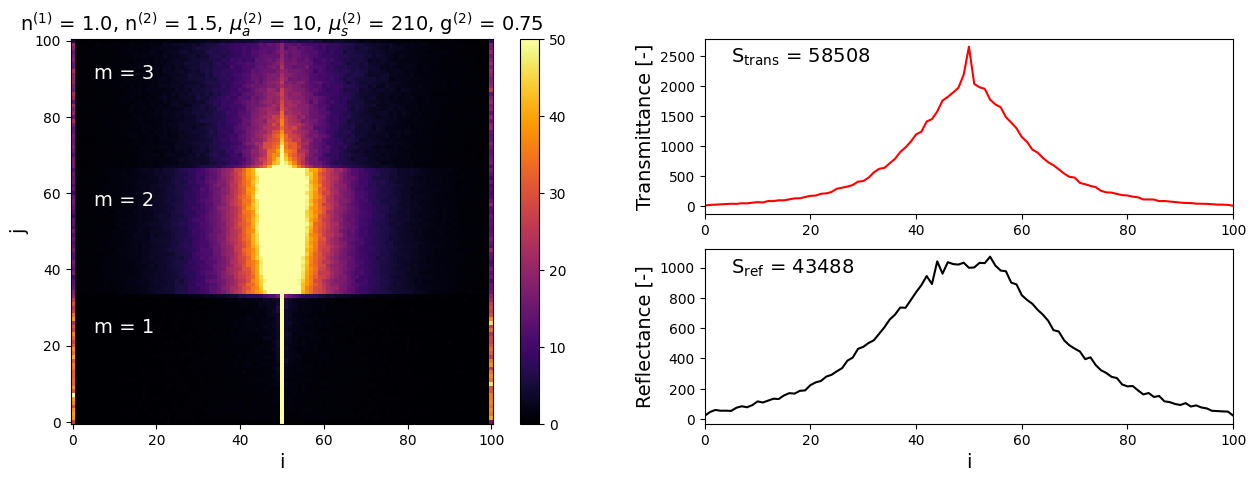

In [5]:
titles = [r"rx = 0.8, ry = 0.6, n$^{(2)}$ = 1.5",
          r"rx = 0.8, ry = 0.6, n$^{(2)}$ = 2.5",
          r"rx = 0.8, ry = 0.6, n$^{(1)}$ = 1.0, n$^{(2)}$ = 1.5",
          r"rx = 0.8, ry = 0.6, n$^{(1)}$ = 1.0, n$^{(2)}$ = 1.5, $\mu_s^{(2)}$ = 10",
          r"Deafult settings",
          r"n$^{(1)}$ = 1.0, n$^{(2)}$ = 1.5, $\mu_a^{(2)}$ = 10, $\mu_s^{(2)}$ = 210",
          r"n$^{(1)}$ = 1.0, n$^{(2)}$ = 1.5, $\mu_a^{(2)}$ = 1, $\mu_s^{(2)}$ = 210",
          r"n$^{(1)}$ = 1.0, n$^{(2)}$ = 1.5, $\mu_a^{(2)}$ = 10, $\mu_s^{(2)}$ = 210, g$^{(2)}$ = 0.75"]

X = range(0, 101, 1)
Y = range(0, 101, 1)
    
for i in range(1,9):
    file_name_abs = "absorption_sym_" + str(i) + ".dat"    
    file_name_ref = "reflectance_sym_" + str(i) + ".dat"    
    file_name_trans = "transmittance_sym_" + str(i) + ".dat"

    photon = np.loadtxt(file_name_abs, dtype=float)
    photon = np.transpose(photon)
    ref = np.loadtxt(file_name_ref, dtype=float)
    trans = np.loadtxt(file_name_trans, dtype=float)

    # plt.figure(figsize=([24,12]))

    plt.figure(figsize=([15,5]))
                              
    plt.subplot(1,2,1)
    plt.pcolormesh(X, Y, photon, cmap="inferno", vmin=0, vmax=50)
    plt.colorbar()
    title_name = titles[i-1]
    plt.title(title_name, fontsize=14)
    plt.xlabel(r'i', fontsize=14)
    plt.ylabel(r'j', fontsize=14)
    plt.text(5, 100/3 - 10, "m = 1", fontsize=14, color="white")
    plt.text(5, 100/3*2 - 10, "m = 2", fontsize=14, color="white")
    plt.text(5, 100/3*3 - 10, "m = 3", fontsize=14, color="white")

    calka_trans = int(np.trapz(trans))

    plt.subplot(2,2,2)
    plt.plot(X, trans, "r-")
    plt.ylabel(r'Transmittance [-]', fontsize=14)
    plt.xlim([0, 100])
    text_calka = r"S$_{\text{trans}}$ = " + str(calka_trans)
    plt.text(5, max(trans)*0.9, text_calka, fontsize=14)

    calka_ref = int(np.trapz(ref))

    plt.subplot(2,2,4)
    plt.plot(X, ref, "k-")
    plt.xlabel(r'i', fontsize=14)
    plt.ylabel(r'Reflectance [-]', fontsize=14)
    plt.xlim([0, 100])
    text_calka = r"S$_{\text{ref}}$ = " + str(calka_ref)
    plt.text(5, max(ref)*0.9, text_calka, fontsize=14)

    fig_save_name = "fig_" + str(i) + ".png"
    plt.savefig(fig_save_name, bbox_inches ="tight", dpi=300)

    plt.show()